<module 'preprocessing' from '/home/tonko22/PycharmProjects/nko_classification/preprocessing.py'>

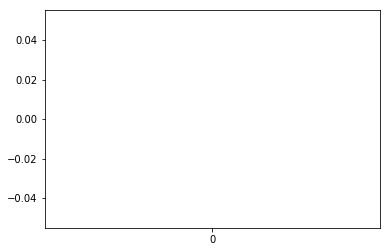

In [81]:
import pandas as pd
import parser
import imp
import preprocessing
import nltk
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100
imp.reload(parser)
imp.reload(preprocessing)
#nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_ru')
# nltk.download('stopwords')

In [3]:
df = pd.read_pickle("np_ngo_classification_links.pkl")
print(len(df))
df

195


,Регион,Название организации,ИНН,Год регистрации,Адресс,Возможность пожертвовать деньги на сайте,Возможность обратиться за помощью,Ссылка на сайт,Вид деятельности 1,Вид деятельности 2,...,Вид деятельности 5,Вид деятельности 6,Вид деятельности 7,Вид деятельности 8,Вид деятельности 9,Вид деятельности 10,Вид деятельности 11,Вид деятельности 12,num_sites,web_text
0,Москва,"Межрегиональная общественная благотворительная организация ""Общество защиты прав потребителей и ...",5032173157,2007-07-12,"г Москва, Орехово-Борисово Южное р-н, МКАД 23-й км, д 6",0,0,http://greenstartup.ru/,3_2,6_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,[function set_cookie(){var now = new Date();var time = now.getTime();time += 19360000 * 1000;now...
1,Москва,"Межрегиональная благотворительная общественная организация инвалидов ""Общество пациентов с перви...",7702370774,2007-08-28,"г Москва, Мещанский р-н, ул Трифоновская, д 49, оф 41",1,1,http://oppid.ru/,2_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-tr..."
3,Москва,"Российский общественный благотворительный фонд ветеранов (пенсионеров) войны, труда и Вооруженны...",7704058560,1998-06-05,"г Москва, р-н Соколиная Гора, ул Щербаковская, д 50/52",1,1,http://www.rbfondveteranov.ru/,1_4,5_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html PUBLIC ""-//W3C//DTD XHTML 1.0 Strict//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.d..."
4,Москва,"Благотворительный фонд поддержки и реализации программ в сфере культуры ""АВС""",7704278848,2011-09-30,"г Москва, р-н Хамовники, пер Знаменский Б., д 13 стр 2",0,0,http://www.avccharity.com/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, [if IE]><script src=""http://html5shiv.googlecode.com/svn/trunk/html5.js""></script><![endi..."
5,Москва,"Благотворительный фонд ""Фонд Валерия Гергиева""",7709402778,2003-01-27,"г Москва, р-н Арбат, ул Молчановка Б., д 23 к 2",0,0,http://gergiev-charity.com/rus/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[HTML PUBLIC ""-//W3C//DTD HTML 4.01 Transitional//EN"" ""http://www.w3.org/TR/html4/loose.dtd"", Бл..."
6,Москва,Международный Благотворительный Фонд Владимира Спивакова,7710012370,1994-05-20,"г Москва, Пресненский р-н, Шведский тупик, д 3, оф 17",1,0,http://spivakov.ru/fund/contacts/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[HTML, Контактная информация и реквизиты | Фонд Спивакова, [if lt IE 9]>\r\n<script src=""http://..."
8,Москва,"Благотворительный фонд помощи бездомным животным ""Ковчег""",7716451494,2014-11-14,"г Москва, Ярославский р-н, Ярославское шоссе, д 2 к 1, кв 157",1,0,http://fond-kovcheg.ru,6_4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, Фонд «Ковчег» | Поможем вместе, window._wpemojiSettings = {""baseUrl"":""http:\/\/s.w.org\/i..."
9,Москва,Благотворительный фонд поддержки детей имени императрицы Александры Федоровны Романовой,7701064809,2011-03-22,"105082, ГОРОД МОСКВА, УЛИЦА ФРИДРИХА ЭНГЕЛЬСА, 75, СТР. 3, ОФ. № 1",1,1,http://www.vfonde.ru/,1_7,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html PUBLIC ""-//W3C//DTD XHTML 1.1//EN"" ""http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd"", Áëàãîòâ..."
10,Москва,"Благотворительный Фонд ""Центр помощи беспризорным детям"" Торгово-промышленной палаты Российской ...",7701295193,2002-03-27,"101000, ГОРОД МОСКВА, БУЛЬВАР ЧИСТОПРУДНЫЙ, 5/10, С.1",1,1,http://www.tppdetfond.ru/,1_3,1_7,...,2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, if(!window.BX)window.BX={};if(!window.BX.message)window.BX.message=function(mess){if(type..."
11,Москва,"Некоммерческая благотворительная организация ""Благотворительный фонд В. Потанина""",7702231587,1999-01-10,"119180, ГОРОД МОСКВА, УЛИЦА ЯКИМАНКА Б., 9, 316",0,0,http://www.kmfond.ru/,4_2,4_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, Фонд ""Кузнецкий Мост"" - Главная, window.addEvent('load', function() {\n\t\t\t\tnew JCapti..."


In [6]:
df["raw_text"] =  df["web_text"].apply(lambda x: " ".join(x))

In [82]:
pp = preprocessing.PreprocessingInterface()
df["text_normalized"] = df["raw_text"].apply(pp.normalize)
df["text_padded"] = df["text_normalized"].apply(pp.pad_punctuation)
# df["tokenized"] = df["text_padded"].apply(pp.tokenize)
df["tokenized"] = df["text_padded"].apply(pp.razdel_tokenize)
df["no_punct"] = df["tokenized"].apply(pp.remove_punct)
df["text_no_stop"] = df["no_punct"].apply(pp.remove_stopwords)
df["preprocessed_tokens"] = df["text_no_stop"].apply(pp.remove_digits)
df.dropna(subset=["preprocessed_tokens"], inplace=True)

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/speech3.6/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [83]:
df.dropna(subset=["preprocessed_tokens"], inplace=True)

In [84]:
# pp.get_most_common(pp.get_categories_df(df["preprocessed_tokens"]))

In [85]:
pp.stats_for_series(df["preprocessed_tokens"])

,Total tokens,Unique tokens,Total texts,Empty texts,Empty tokens
Count,11166790,97701,195,1,0


In [14]:
df["lemmatized"] = df["preprocessed_tokens"].apply(pp.lemmatize_tokens_with_mystem)
df["lemmatized"].replace('', np.nan, inplace=True)
df["preprocessed_text"] = df["lemmatized"].apply(" ".join)
df.dropna(subset=["preprocessed_tokens"], inplace=True)

In [15]:
df

,Регион,Название организации,ИНН,Год регистрации,Адресс,Возможность пожертвовать деньги на сайте,Возможность обратиться за помощью,Ссылка на сайт,Вид деятельности 1,Вид деятельности 2,...,web_text,raw_text,text_normalized,text_padded,tokenized,no_punct,text_no_stop,preprocessed_tokens,lemmatized,preprocessed_text
0,Москва,"Межрегиональная общественная благотворительная организация ""Общество защиты прав потребителей и ...",5032173157,2007-07-12,"г Москва, Орехово-Борисово Южное р-н, МКАД 23-й км, д 6",0,0,http://greenstartup.ru/,3_2,6_1,...,[function set_cookie(){var now = new Date();var time = now.getTime();time += 19360000 * 1000;now...,function set_cookie(){var now = new Date();var time = now.getTime();time += 19360000 * 1000;now....,function set_cookie(){var now = new date();var time = now\ngettime();time += 19360000 * 1000;now...,function set_cookie ( ) { var now = new date ( ) ; var time = now\ngettime ( ) ; time ...,"[function, set_cookie, (, ), {, var, now, =, new, date, (, ), ;, var, time, =, now, gettime, (, ...","[function, set_cookie, var, now, new, date, var, time, now, gettime, time, 19360000, 1000, now, ...","[function, set_cookie, var, now, new, date, var, time, now, gettime, time, 19360000, 1000, now, ...","[function, set_cookie, var, now, new, date, var, time, now, gettime, time, now, settime, time, d...","[function, set, _, cookie, var, now, new, date, var, time, now, gettime, time, now, settime, tim...",function set _ cookie var now new date var time now gettime time now settime time document cooki...
1,Москва,"Межрегиональная благотворительная общественная организация инвалидов ""Общество пациентов с перви...",7702370774,2007-08-28,"г Москва, Мещанский р-н, ул Трифоновская, д 49, оф 41",1,1,http://oppid.ru/,2_1,NaN,...,"[html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-tr...","html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-tra...","html public ""-//w3c//dtd xhtml 1\n0 transitional//en"" ""http://www\nw3\norg/tr/xhtml1/dtd/xhtml1-...","html public "" - / / w3c / / dtd xhtml 1\n0 transitional / / en "" "" http: / / www\nw3\norg...","[html, public, ``, -, /, /, w3c, /, /, dtd, xhtml, 1, 0, transitional, /, /, en, ``, ``, http, :...","[html, public, w3c, dtd, xhtml, 1, 0, transitional, en, http, www, w3, org, tr, xhtml1, dtd, xht...","[html, public, w3c, dtd, xhtml, 1, 0, transitional, en, http, www, w3, org, tr, xhtml1, dtd, xht...","[html, public, w3c, dtd, xhtml, transitional, en, http, www, w3, org, tr, xhtml1, dtd, xhtml1-tr...","[html, public, w3c, dtd, xhtml, transitional, en, http, www, w3, org, tr, xhtml1, dtd, xhtml1, -...",html public w3c dtd xhtml transitional en http www w3 org tr xhtml1 dtd xhtml1 - transitional dt...
3,Москва,"Российский общественный благотворительный фонд ветеранов (пенсионеров) войны, труда и Вооруженны...",7704058560,1998-06-05,"г Москва, р-н Соколиная Гора, ул Щербаковская, д 50/52",1,1,http://www.rbfondveteranov.ru/,1_4,5_2,...,"[html PUBLIC ""-//W3C//DTD XHTML 1.0 Strict//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.d...","html PUBLIC ""-//W3C//DTD XHTML 1.0 Strict//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dt...","html public ""-//w3c//dtd xhtml 1\n0 strict//en"" ""http://www\nw3\norg/tr/xhtml1/dtd/xhtml1-strict...","html public "" - / / w3c / / dtd xhtml 1\n0 strict / / en "" "" http: / / www\nw3\norg / tr ...","[html, public, ``, -, /, /, w3c, /, /, dtd, xhtml, 1, 0, strict, /, /, en, ``, ``, http, :, /, /...","[html, public, w3c, dtd, xhtml, 1, 0, strict, en, http, www, w3, org, tr, xhtml1, dtd, xhtml1-st...","[html, public, w3c, dtd, xhtml, 1, 0, strict, en, http, www, w3, org, tr, xhtml1, dtd, xhtml1-st...","[html, public, w3c, dtd, xhtml, strict, en, http, www, w3, org, tr, xhtml1, dtd, xhtml1-strict, ...","[html, public, w3c, dtd, xhtml, strict, en, http, www, w3, org, tr, xhtml1, dtd, xhtml1, -, stri...",html public w3c dtd xhtml strict en http www w3

In [61]:
test_string = df["preprocessed_text"].loc[1]

In [69]:
from alphabet_detector import AlphabetDetector
ad = AlphabetDetector()

In [73]:
def filter_non_cyrillic(text: str):
    return " ".join([t for t in text.split(" ") if ad.only_alphabet_chars(t, "CYRILLIC")])

df["cyrillic_text"] = df["preprocessed_text"].apply(filter_non_cyrillic)

In [79]:
df["preprocessed_text"].loc[1]

'html public w3c dtd xhtml transitional en http www w3 org tr xhtml1 dtd xhtml1 - transitional dtd оппид общество пациент первичный иммунодефицит href pdf href txt href mp3 href aiff href wav href ogg href wma href zip href rar href ace href tar gz href tgz href mpg href mpeg href avi href mv2 href mov href mp4 href wmv href swf href xls href doc href trackback href href rss2 href feed href postcomment href respond href action edit padding - bottom : 2px padding - left : 22px padding - top : 2px background transparent href pdf background url http oppid ru wp - content plugins file - icons icons silkicons page _ white _ acrobat png no - repeat scroll left center href txt background url http oppid ru wp - content plugins file - icons icons silkicons page _ white _ text png no - repeat scroll left center href mp3 href aiff href wav href ogg href wma background url http oppid ru wp - content plugins file - icons icons silkicons music png no - repeat scroll left center href zip href rar hre

In [80]:
df["cyrillic_text"].loc[1]

'- оппид общество пациент первичный иммунодефицит - : - : - : - - _ _ - - - _ _ - - - - - - _ _ - - - - - - _ _ - - - _ _ - - - _ _ - - - - - - - - - - - - - - - _ _ - _  : 20 - _ _ _ _ - _ русый - _ англ главный цель информационный канал донор контакт зайти сайт пациентский организация  “  оппид  ”  общество пациент первичный иммунодефицит сайт представлять универсальный инструмент общение пациент первичный иммунодефицит вопрос доктор становиться член оппид февраль открывать заседание совет общественный организация защита право пациент министерство здравоохранение российский федерация февраль 21 : 25 пост - релиз день рз февраль год министерство здравоохранение российский федерация состояться открывать заседание совет общественный организация защита право пациент посвящать международный день редкий заболевание представитель орган государственный власть специалист пациентский общественный организация объединяться обсуждать проблема стоять человек страдающий редкий заболевание заседание

In [71]:
for each in test_string.split(" "):
    if ad.only_alphabet_chars(each, "CYRILLIC"):
        print(each, "True")
    else:
        print(each, "False")

html False
public False
w3c False
dtd False
xhtml False
transitional False
en False
http False
www False
w3 False
org False
tr False
xhtml1 False
dtd False
xhtml1 False
- True
transitional False
dtd False
оппид True
общество True
пациент True
первичный True
иммунодефицит True
href False
pdf False
href False
txt False
href False
mp3 False
href False
aiff False
href False
wav False
href False
ogg False
href False
wma False
href False
zip False
href False
rar False
href False
ace False
href False
tar False
gz False
href False
tgz False
href False
mpg False
href False
mpeg False
href False
avi False
href False
mv2 False
href False
mov False
href False
mp4 False
href False
wmv False
href False
swf False
href False
xls False
href False
doc False
href False
trackback False
href False
href False
rss2 False
href False
feed False
href False
postcomment False
href False
respond False
href False
action False
edit False
padding False
- True
bottom False
: True
2px False
padding False
- True
left Fa

True

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df["preprocessed_text"]
y = pd.get_dummies(df[[
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    ngram_range=(1, 2),
    max_features=10000)
word_vectorizer.fit(X)

train_word = word_vectorizer.transform(X_train)
test_word = word_vectorizer.transform(X_test)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='char',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(X)

train_char = char_vectorizer.transform(X_train)
test_char = char_vectorizer.transform(X_test)

In [40]:
from scipy.sparse import hstack
train_features = hstack([train_word, train_char])
test_features = hstack([test_word, test_char])

In [58]:
forest = RandomForestClassifier(class_weight="balanced")
forest.fit(train_features, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
def evaluate(clf, test_features, y_test):
    y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average="weighted")

evaluate(forest, test_features, y_test)

/home/tonko22/.virtualenvs/speech3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tonko22/.virtualenvs/speech3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.015384615384615385, 0.008571428571428572)

In [86]:
!git commit -a -m "modeling updates"

[master 333c817] modeling updates
 2 files changed, 955 insertions(+), 125 deletions(-)


In [87]:
!git push

Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 8.05 KiB | 0 bytes/s, done.
Total 4 (delta 3), reused 0 (d